In [1]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv('Crypto_Tweets.csv')
print(df.shape)
df.head()

(34072, 8)


,Date,ID,Tweet,Username,Location,Favorites,Retweets,Followers
0,2022-01-01 23:50:17+00:00,1477426984401657857,"“#Bitcoin solves a ~$300 trillion problem, and...",BitcoinSapiens,21 Million Citadels,1908,249,16180
1,2022-01-01 23:24:21+00:00,1477420461122375683,Some statistics to start the year:\n\nDuring 2...,DigiEconomist,NaN,50793,18615,14240
2,2022-01-01 22:23:31+00:00,1477405149148688389,Asset prices go parabolic and your pay stays s...,thelevelupexp,Orange Coin,1289,229,4722
3,2022-01-01 22:14:00+00:00,1477402754234601479,"1. In 2013, I wrote this piece on ""how Bitcoin...",VitalikButerin,Earth,3294,307,4155547
4,2022-01-01 22:05:33+00:00,1477400628573859840,Don’t tell me #Bitcoin wealth is centralized w...,Dennis_Porter_,"Oregon, USA",3016,330,115305


In [3]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

df = df.sort_values(by = 'Date')
df['Tweet'] = [clean_tweet(tweet) for tweet in df['Tweet']]
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,Date,ID,Tweet,Username,Location,Favorites,Retweets,Followers
0,2022-01-01 00:00:50+00:00,1477067252784586756,Fuck Off 500 nft eth giveaway Just RT and Foll...,pixelpartynft,LuckyBog 😎 TheMetaDealer,1157,1394,23343
1,2022-01-01 00:00:52+00:00,1477067263031271426,Bitcoin has started a new yearly candle,intocryptoverse,NaN,3391,283,681517
2,2022-01-01 00:03:09+00:00,1477067835503435782,Bitcoin s 2021 yearly candle in the books Than...,WClementeIII,Newsletter👉🏽,4956,399,656584
3,2022-01-01 00:42:43+00:00,1477077795108835329,2021 is in the rearview mirror Let s Go Bitcoin,Bitcoin,Worldwide,2903,694,5440179
4,2022-01-01 00:46:41+00:00,1477078793810501641,FOLLOW RT AND LIKE THIS TWEET FOR THE CHANCE T...,TitanXBT,NaN,337,252,43990


In [5]:
analyzer = SentimentIntensityAnalyzer()
compound = []
label = []
negative = []
positive = []
neutral = []
for s in df.Tweet:
    vs = analyzer.polarity_scores(str(s))
    neg = vs['neg']
    pos = vs['pos']
    neu = vs['neu']
    com = vs['compound']
    
    if com >= 0.05:
        label.append('positive')
    elif com <= -0.05:
        label.append('negative')
    else:
        label.append('neutral')
    
    positive.append(pos)
    neutral.append(neu)
    negative.append(neg)
    compound.append(com)

df["compound"] = compound
df["label"] = label
df["positive"] = positive
df["negative"] = negative
df["neutral"] = neutral
df.head()

,Date,ID,Tweet,Username,Location,Favorites,Retweets,Followers,compound,label,positive,negative,neutral
0,2022-01-01 00:00:50+00:00,1477067252784586756,Fuck Off 500 nft eth giveaway Just RT and Foll...,pixelpartynft,LuckyBog 😎 TheMetaDealer,1157,1394,23343,0.5106,positive,0.259,0.133,0.608
1,2022-01-01 00:00:52+00:00,1477067263031271426,Bitcoin has started a new yearly candle,intocryptoverse,NaN,3391,283,681517,0.0000,neutral,0.000,0.000,1.000
2,2022-01-01 00:03:09+00:00,1477067835503435782,Bitcoin s 2021 yearly candle in the books Than...,WClementeIII,Newsletter👉🏽,4956,399,656584,0.9485,positive,0.430,0.000,0.570
3,2022-01-01 00:42:43+00:00,1477077795108835329,2021 is in the rearview mirror Let s Go Bitcoin,Bitcoin,Worldwide,2903,694,5440179,0.0000,neutral,0.000,0.000,1.000
4,2022-01-01 00:46:41+00:00,1477078793810501641,FOLLOW RT AND LIKE THIS TWEET FOR THE CHANCE T...,TitanXBT,NaN,337,252,43990,0.9435,positive,0.349,0.000,0.651


In [6]:
df["label"].value_counts() / df.shape[0]

positive    0.673456
neutral     0.214193
negative    0.112350
Name: label, dtype: float64

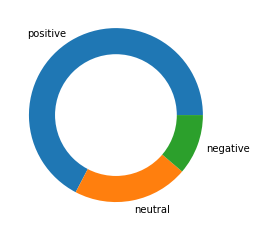

In [7]:
mylabels = ["positive", "neutral", "negative"]
plt.pie(df["label"].value_counts(), labels = mylabels)
circle = plt.Circle(xy=(0,0), radius=0.7, facecolor='white')
plt.gca().add_artist(circle)
plt.show() 

In [ ]:
# mean & std over time
# smoothly dataset
# how many tweets per hour
# daily / weekly flunctuation
# how many tweets per hour
# followers/sum(followers)

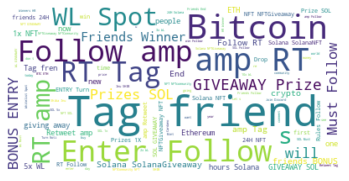

<Figure size 360x360 with 0 Axes>

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate("".join(df.Tweet))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('fig/wordcloud.jpg', dpi=200)
plt.figure(figsize=(5, 5))
plt.show()

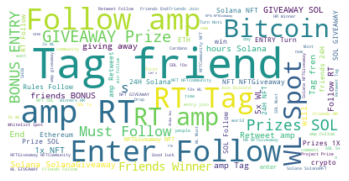

<Figure size 360x360 with 0 Axes>

In [9]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate("".join([df.Tweet[i] for i in range(len(df.Tweet)) if df.label[i] == 'positive']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('fig/wordcloud_pos.jpg', dpi=200)
plt.figure(figsize=(5, 5))
plt.show()

In [11]:
# from nltk.probability import FreqDist
# pos_words = "".join([df.Tweet[i] for i in range(len(df.Tweet)) if df.label[i] == 'positive'])
# mp = FreqDist(pos_words.split(" "))
# mp.most_common(20)

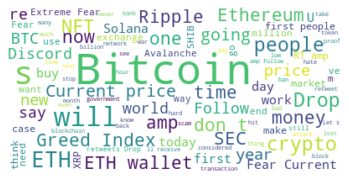

<Figure size 360x360 with 0 Axes>

In [10]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate("".join([df.Tweet[i] for i in range(len(df.Tweet)) if df.label[i] == 'negative']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('fig/wordcloud_neg.jpg', dpi=200)
plt.figure(figsize=(5, 5))
plt.show()

In [11]:
scores = []
total_follower = int(sum(df.Followers))
total_favorite = int(sum(df.Favorites))
total_retweet = int(sum(df.Retweets))

for i in range(df.shape[0]):
    follower = int(df.Followers[i]) / total_follower
    favorite = int(df.Favorites[i]) / total_favorite
    retweet = int(df.Retweets[i]) / total_retweet
    scores.append(df.compound[i] * follower * (favorite / follower) * retweet)

df["score"] = scores
df.head()

,Date,ID,Tweet,Username,Location,Favorites,Retweets,Followers,compound,label,positive,negative,neutral,score
0,2022-01-01 00:00:50+00:00,1477067252784586756,Fuck Off 500 nft eth giveaway Just RT and Foll...,pixelpartynft,LuckyBog 😎 TheMetaDealer,1157,1394,23343,0.5106,positive,0.259,0.133,0.608,3.677868e-10
1,2022-01-01 00:00:52+00:00,1477067263031271426,Bitcoin has started a new yearly candle,intocryptoverse,NaN,3391,283,681517,0.0000,neutral,0.000,0.000,1.000,0.000000e+00
2,2022-01-01 00:03:09+00:00,1477067835503435782,Bitcoin s 2021 yearly candle in the books Than...,WClementeIII,Newsletter👉🏽,4956,399,656584,0.9485,positive,0.430,0.000,0.570,8.376464e-10
3,2022-01-01 00:42:43+00:00,1477077795108835329,2021 is in the rearview mirror Let s Go Bitcoin,Bitcoin,Worldwide,2903,694,5440179,0.0000,neutral,0.000,0.000,1.000,0.000000e+00
4,2022-01-01 00:46:41+00:00,1477078793810501641,FOLLOW RT AND LIKE THIS TWEET FOR THE CHANCE T...,TitanXBT,NaN,337,252,43990,0.9435,positive,0.349,0.000,0.651,3.578422e-11


In [12]:
# sentiment analysis 
df = df.drop_duplicates()
tweets = df.copy()
tweets['ID'] = np.ones(tweets.shape[0]) # help to count the number of tweets per hour
tweets['Date'] = pd.to_datetime(tweets['Date'])
tweets.index = tweets['Date']

tweets_grouped = tweets.resample('1h').sum()
tweets_grouped.index = pd.to_datetime([str(ind)[:19] for ind in tweets_grouped.index])
tweets_grouped.head()

,ID,Favorites,Retweets,Followers,compound,positive,negative,neutral,score
2022-01-01 00:00:00,7.0,15496,3596,8247923,3.1809,1.195,0.133,5.672,1.291778e-09
2022-01-01 01:00:00,6.0,8699,5592,3531524,3.4477,0.946,0.065,4.989,3.246132e-09
2022-01-01 02:00:00,10.0,23675,6850,4728124,4.4043,1.502,0.173,8.325,2.568304e-09
2022-01-01 03:00:00,3.0,3922,2416,697330,1.7675,0.537,0.059,2.404,8.356866e-10
2022-01-01 04:00:00,1.0,846,1005,33065,0.3182,0.180,0.092,0.728,1.208247e-10


In [13]:
# group by day
tweets_day = tweets.resample('1d').sum()
tweets_day.index = pd.to_datetime([str(ind)[:19] for ind in tweets_day.index])
tweets_day.head()

,ID,Favorites,Retweets,Followers,compound,positive,negative,neutral,score
2022-01-01,140.0,365821,118785,74876400,53.6750,20.169,4.297,115.539,3.621840e-07
2022-01-02,133.0,390226,127216,117939541,44.7267,19.743,5.067,108.195,-2.850261e-07
2022-01-03,164.0,452618,129052,95316419,56.9146,25.631,5.825,132.548,1.098838e-07
2022-01-04,128.0,364650,104973,107936579,38.8181,19.791,5.959,102.249,1.089678e-07
2022-01-05,164.0,438004,101420,149371198,45.5891,20.031,5.937,138.031,7.361811e-08


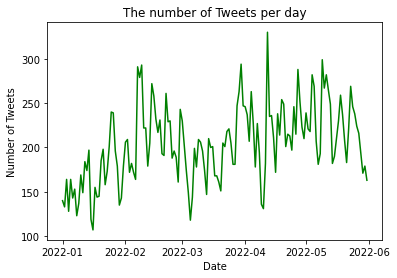

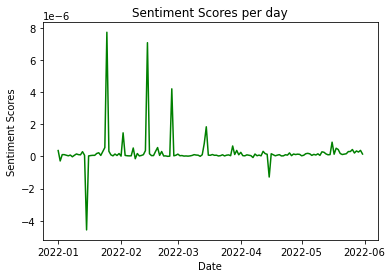

In [14]:
plt.plot_date(tweets_day.index, tweets_day['ID'], 'g')
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("The number of Tweets per day")
plt.savefig('fig/daily_tweets.jpg', dpi=200)
plt.show()

plt.plot_date(tweets_day.index, tweets_day['score'], 'g')
plt.xlabel("Date")
plt.ylabel("Sentiment Scores")
plt.title("Sentiment Scores per day")
plt.savefig('fig/daily_score.jpg', dpi=200)
plt.show()

In [15]:
# group by week
tweets_week = tweets.resample('1w').sum()
tweets_week.index = pd.to_datetime([str(ind)[:19] for ind in tweets_week.index])
tweets_week.head()

,ID,Favorites,Retweets,Followers,compound,positive,negative,neutral,score
2022-01-02,273.0,756047,246001,192815941,98.4017,39.912,9.364,223.734,7.715789e-08
2022-01-09,1012.0,2790166,709834,743987447,296.2958,139.998,46.401,825.604,4.557523e-07
2022-01-16,1099.0,3847929,1029809,903475104,320.9402,150.762,41.578,906.662,-3.826057e-06
2022-01-23,1158.0,3356240,974135,825437845,324.9034,149.875,47.509,960.615,9.519296e-07
2022-01-30,1333.0,4822130,1116834,1056303724,397.6612,188.589,49.086,1095.321,8.913893e-06


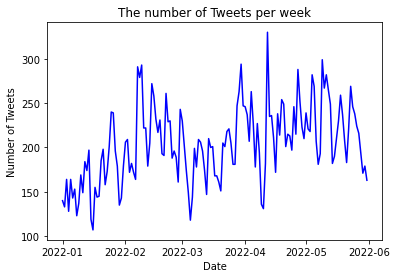

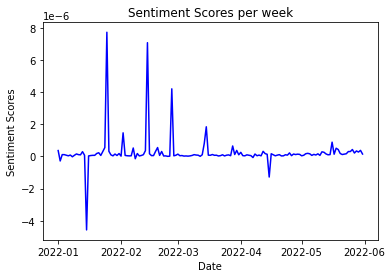

In [16]:
plt.plot_date(tweets_day.index, tweets_day['ID'], 'b')
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.title("The number of Tweets per week")
plt.savefig('fig/weekly_tweets.jpg', dpi=200)
plt.show()

plt.plot_date(tweets_day.index, tweets_day['score'], 'b')
plt.xlabel("Date")
plt.ylabel("Sentiment Scores")
plt.title("Sentiment Scores per week")
plt.savefig('fig/weekly_score.jpg', dpi=200)
plt.show()

In [17]:
df_price = pd.read_csv("../data/flattened_data.csv")
df_price.head()

,datetime,1INCHBUSD_open,1INCHBUSD_high,1INCHBUSD_low,1INCHBUSD_close,1INCHBUSD_volume,1INCHUSD_open,1INCHUSD_high,1INCHUSD_low,1INCHUSD_close,...,ZRXBUSD_open,ZRXBUSD_high,ZRXBUSD_low,ZRXBUSD_close,ZRXBUSD_volume,ZRXUSD_open,ZRXUSD_high,ZRXUSD_low,ZRXUSD_close,ZRXUSD_volume
0,2022-01-01 00:00:00,2.410,2.450,2.406,2.429,27034.1,2.39,2.42,2.39,2.42,...,0.8225,0.8375,0.8225,0.8349,2957.0,0.803274,0.815819,0.803274,0.815819,124094.48027
1,2022-01-01 01:00:00,2.434,2.441,2.421,2.424,15641.5,2.42,2.44,2.41,2.44,...,0.8367,0.8367,0.8262,0.8262,7690.0,0.815761,0.818488,0.812232,0.816939,430003.38704
2,2022-01-01 02:00:00,2.423,2.444,2.418,2.434,10500.5,2.43,2.45,2.43,2.44,...,0.8249,0.8305,0.8249,0.8296,1352.0,0.817332,0.841967,0.816370,0.825341,545121.67633
3,2022-01-01 03:00:00,2.433,2.449,2.433,2.435,11621.9,2.43,2.45,2.43,2.43,...,0.8310,0.8327,0.8271,0.8271,5814.0,0.825479,0.826189,0.819242,0.821205,174704.12975
4,2022-01-01 04:00:00,2.436,2.454,2.415,2.428,18122.9,2.42,2.43,2.40,2.40,...,0.8262,0.8326,0.8239,0.8326,4731.0,0.822383,0.824401,0.814999,0.821184,109516.28991


In [18]:
# daily close price
crypto_usd = df_price.copy()
crypto_usd['datetime'] = pd.to_datetime(crypto_usd['datetime'])
crypto_usd.index = crypto_usd['datetime']

crypto_usd_day = crypto_usd.copy()
crypto_usd_day = crypto_usd_day.resample('1d').mean()
crypto_usd_day.head()

,1INCHBUSD_open,1INCHBUSD_high,1INCHBUSD_low,1INCHBUSD_close,1INCHBUSD_volume,1INCHUSD_open,1INCHUSD_high,1INCHUSD_low,1INCHUSD_close,1INCHUSD_volume,...,ZRXBUSD_open,ZRXBUSD_high,ZRXBUSD_low,ZRXBUSD_close,ZRXBUSD_volume,ZRXUSD_open,ZRXUSD_high,ZRXUSD_low,ZRXUSD_close,ZRXUSD_volume
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2.469958,2.489625,2.457208,2.472792,18646.591667,2.449583,2.474583,2.439583,2.457500,37118.530833,...,0.846171,0.852504,0.840971,0.846671,8183.875000,0.835831,0.844631,0.831403,0.838668,199007.603556
2022-01-02,2.539958,2.557000,2.525792,2.544875,23825.700000,2.529167,2.546667,2.512917,2.530833,31923.704583,...,0.885088,0.895271,0.880204,0.887729,14558.750000,0.876020,0.884844,0.869986,0.876754,179215.971657
2022-01-03,2.566750,2.591833,2.545542,2.564458,34615.158333,2.576667,2.601667,2.553750,2.577500,44511.156667,...,0.928933,0.939792,0.919571,0.929288,46955.708333,0.925800,0.938144,0.916717,0.927908,371963.465894
2022-01-04,2.535375,2.553917,2.516833,2.537208,38523.333333,2.539167,2.559583,2.516250,2.537500,47541.579583,...,0.919550,0.926433,0.914008,0.920175,9235.250000,0.923885,0.930377,0.915319,0.921648,142226.731891
2022-01-05,2.458542,2.472625,2.423375,2.446625,37790.504167,2.506250,2.522083,2.473750,2.498750,65787.937917,...,0.896896,0.902938,0.883033,0.891471,19966.166667,0.916523,0.924937,0.904026,0.913659,235311.171972


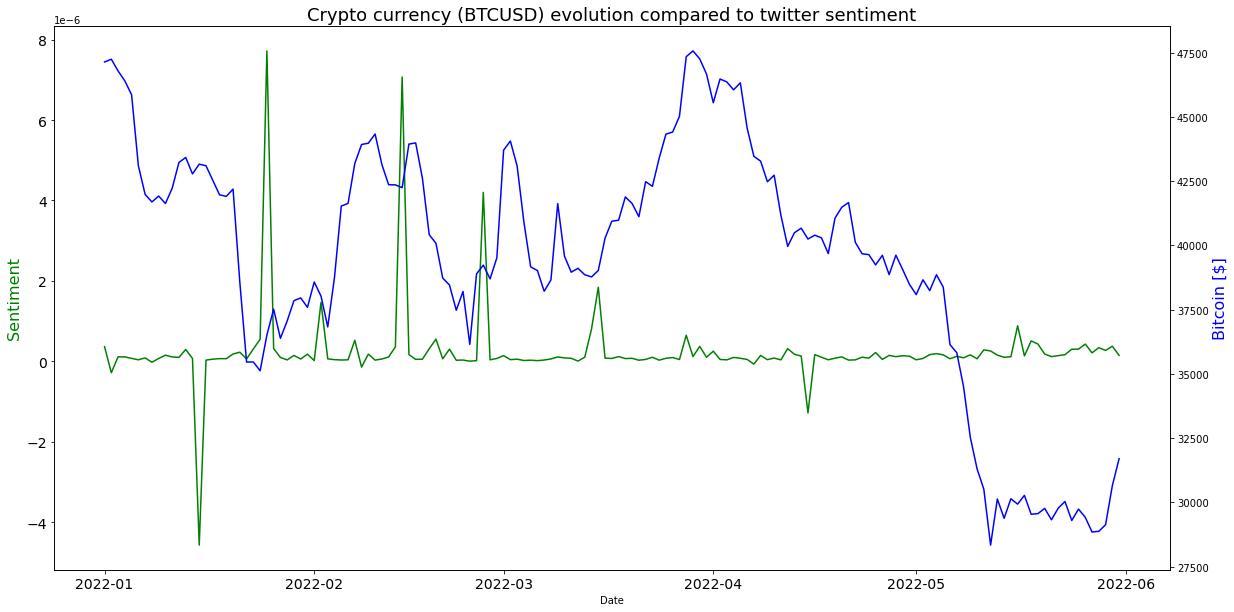

In [19]:
# Daily grouped
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Crypto currency (BTCUSD) evolution compared to twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(crypto_usd_day.index, tweets_day['score'], 'g-')
ax2.plot_date(crypto_usd_day.index, crypto_usd_day['BTCUSD_close'], 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
ax1.set_xlabel("Date")
plt.savefig('fig/btc_score.jpg')
plt.show()

In [20]:
crypto_usd = crypto_usd.drop(['datetime'], axis=1)
crypto_usd['ID'] = tweets_grouped['ID']
crypto_usd['Favorites'] = tweets_grouped['Favorites']
crypto_usd['Retweets'] = tweets_grouped['Retweets']
crypto_usd['Followers'] = tweets_grouped['Followers']
crypto_usd['compound'] = tweets_grouped['compound']
crypto_usd['positive'] = tweets_grouped['positive']
crypto_usd['negative'] = tweets_grouped['negative']
crypto_usd['neutral'] = tweets_grouped['neutral']
crypto_usd['score'] = tweets_grouped['score']
crypto_usd.head()

,1INCHBUSD_open,1INCHBUSD_high,1INCHBUSD_low,1INCHBUSD_close,1INCHBUSD_volume,1INCHUSD_open,1INCHUSD_high,1INCHUSD_low,1INCHUSD_close,1INCHUSD_volume,...,ZRXUSD_volume,ID,Favorites,Retweets,Followers,compound,positive,negative,neutral,score
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,2.410,2.450,2.406,2.429,27034.1,2.39,2.42,2.39,2.42,47726.30,...,124094.48027,7.0,15496,3596,8247923,3.1809,1.195,0.133,5.672,1.291778e-09
2022-01-01 01:00:00,2.434,2.441,2.421,2.424,15641.5,2.42,2.44,2.41,2.44,109643.15,...,430003.38704,6.0,8699,5592,3531524,3.4477,0.946,0.065,4.989,3.246132e-09
2022-01-01 02:00:00,2.423,2.444,2.418,2.434,10500.5,2.43,2.45,2.43,2.44,22534.85,...,545121.67633,10.0,23675,6850,4728124,4.4043,1.502,0.173,8.325,2.568304e-09
2022-01-01 03:00:00,2.433,2.449,2.433,2.435,11621.9,2.43,2.45,2.43,2.43,16066.99,...,174704.12975,3.0,3922,2416,697330,1.7675,0.537,0.059,2.404,8.356866e-10
2022-01-01 04:00:00,2.436,2.454,2.415,2.428,18122.9,2.42,2.43,2.40,2.40,35143.16,...,109516.28991,1.0,846,1005,33065,0.3182,0.180,0.092,0.728,1.208247e-10


In [21]:
crypto_usd.to_csv("tweet_price.csv")

In [22]:
df_temp = pd.read_csv('tweet_price.csv')
df_temp.head()

,datetime,1INCHBUSD_open,1INCHBUSD_high,1INCHBUSD_low,1INCHBUSD_close,1INCHBUSD_volume,1INCHUSD_open,1INCHUSD_high,1INCHUSD_low,1INCHUSD_close,...,ZRXUSD_volume,ID,Favorites,Retweets,Followers,compound,positive,negative,neutral,score
0,2022-01-01 00:00:00,2.410,2.450,2.406,2.429,27034.1,2.39,2.42,2.39,2.42,...,124094.48027,7.0,15496,3596,8247923,3.1809,1.195,0.133,5.672,1.291778e-09
1,2022-01-01 01:00:00,2.434,2.441,2.421,2.424,15641.5,2.42,2.44,2.41,2.44,...,430003.38704,6.0,8699,5592,3531524,3.4477,0.946,0.065,4.989,3.246132e-09
2,2022-01-01 02:00:00,2.423,2.444,2.418,2.434,10500.5,2.43,2.45,2.43,2.44,...,545121.67633,10.0,23675,6850,4728124,4.4043,1.502,0.173,8.325,2.568304e-09
3,2022-01-01 03:00:00,2.433,2.449,2.433,2.435,11621.9,2.43,2.45,2.43,2.43,...,174704.12975,3.0,3922,2416,697330,1.7675,0.537,0.059,2.404,8.356866e-10
4,2022-01-01 04:00:00,2.436,2.454,2.415,2.428,18122.9,2.42,2.43,2.40,2.40,...,109516.28991,1.0,846,1005,33065,0.3182,0.180,0.092,0.728,1.208247e-10
